<a href="https://colab.research.google.com/github/khushipr/Parameter_Optimization_of_SVM/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [29]:
uploaded = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data')

In [30]:
dataset = uploaded
dataset.columns = ['target', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
dataset.head()

,target,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


###Pre-Processing of Dataset

In [31]:
dataset.shape

(19999, 17)

In [32]:
dataset.isnull().sum()

target    0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
dtype: int64

In [33]:
# dataset = dataset.drop(['Date','Time'],axis=1)

<AxesSubplot: xlabel='target', ylabel='count'>

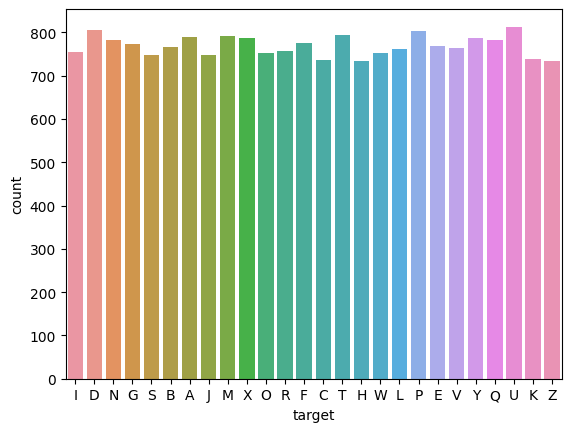

In [34]:
sns.countplot(x = 'target', data=dataset)

In [35]:
X = dataset.iloc[:,1:]
y = dataset['target']

In [36]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.5103336 ,  1.50233794, -1.05333222, ..., -0.21908737,
         0.12001271,  1.35941359],
       [-0.01236238,  1.19972472,  0.43585819, ..., -0.86561656,
        -0.26955622,  0.74116389],
       [ 1.55572554,  1.19972472,  0.43585819, ...,  1.07397101,
        -0.65912516,  0.12291419],
       ...,
       [ 1.03302957,  0.59449827,  0.43585819, ...,  2.36702938,
        -0.65912516, -2.35008462],
       [-1.05775432, -1.22118107, -0.55693542, ...,  0.42744182,
         0.50958164,  0.12291419],
       [-0.01236238,  0.59449827,  0.43585819, ..., -0.86561656,
        -0.65912516,  0.12291419]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [37]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [38]:
samples

[(       A   B  C  D  E   F  G  H  I   J   K   L  M   N  O   P
  9397   3   4  4  6  2   7  7  9  7   7   6   8  3   8  4   8
  8996   6  10  6  5  3  12  3  6  2  12   2  10  4   3  3  10
  18239  1   0  2  1  0   2  1  6  5   0   2   4  0   8  0   8
  15524  1   7  0  5  1   7  7  5  3   7   6   8  0   8  0   8
  10297  9  13  8  8  4   8  3  4  3   8   4   5  4   7  5   9
  ...   ..  .. .. .. ..  .. .. .. ..  ..  ..  .. ..  .. ..  ..
  13123  3   4  4  3  2   6  7  5  5   9   7  10  2   9  4   9
  19648  9  12  9  6  4   7  8  5  4   9  10   9  7  10  5   9
  9845   7  10  7  8  5   6  6  7  7  10   7  11  2   9  5   9
  10799  5   5  8  7  4  11  8  5  2   6   9   8  8   9  0   8
  2732   4   7  6  5  4   9  6  2  8  11   5   9  3   8  5  10
  
  [13999 rows x 16 columns],
         A   B  C  D   E   F   G  H  I   J   K   L   M   N   O   P
  11003  5   9  7  7   3   5  13  4  5  13   7   3   1  10   2   6
  4981   5   9  5  7   4   3  11  2  3   9  11   8   3  12   1   7
  16642  4 

### Creation of a Fitness Function

In [39]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [40]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [41]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  0.72 Best Epsilon =  0.05
Best Accuracy =  0.91 Best Kernel =  poly Best Nu =  4.96 Best Epsilon =  0.25
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  8.79 Best Epsilon =  4.19
Best Accuracy =  0.91 Best Kernel =  poly Best Nu =  2.92 Best Epsilon =  3.36
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  7.32 Best Epsilon =  4.57
Best Accuracy =  0.91 Best Kernel =  poly Best Nu =  9.05 Best Epsilon =  0.09
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  7.82 Best Epsilon =  9.43
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  3.93 Best Epsilon =  0.45
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  9.64 Best Epsilon =  3.49
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  5.89 Best Epsilon =  0.16


###Creation of a Result Table

In [42]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.92,poly,0.72,0.05
1,2,0.91,poly,4.96,0.25
2,3,0.92,poly,8.79,4.19
3,4,0.91,poly,2.92,3.36
4,5,0.92,poly,7.32,4.57
5,6,0.91,poly,9.05,0.09
6,7,0.92,poly,7.82,9.43
7,8,0.93,poly,3.93,0.45
8,9,0.93,poly,9.64,3.49
9,10,0.93,poly,5.89,0.16


### Plotting of the Convergence Graph/Linear Curve

In [43]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [44]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [45]:
train_sizes

array([  125,   380,   635,   889,  1144,  1398,  1653,  1907,  2162,
        2416,  2671,  2926,  3180,  3435,  3689,  3944,  4198,  4453,
        4707,  4962,  5217,  5471,  5726,  5980,  6235,  6489,  6744,
        6998,  7253,  7507,  7762,  8017,  8271,  8526,  8780,  9035,
        9289,  9544,  9798, 10053, 10308, 10562, 10817, 11071, 11326,
       11580, 11835, 12089, 12344, 12599])

In [46]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

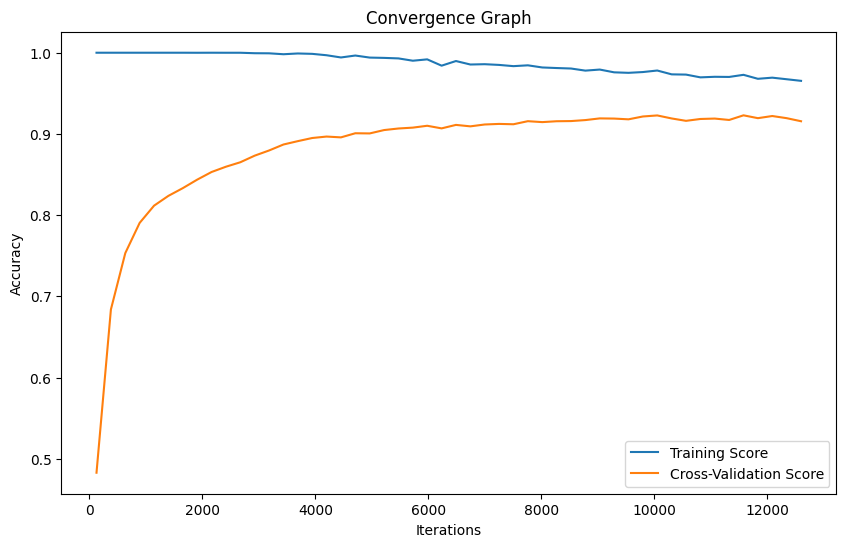

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()